# About Dataset

RowNumber—corresponds to the record (row) number and has no effect on the output.

CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.
CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.

Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

Complain—customer has complaint or not.

Satisfaction Score—Score provided by the customer for their complaint resolution.

Card Type—type of card hold by the customer.

Points Earned—the points earned by the customer for using credit card.

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

# Import Libraries

In [16]:
import pandas as pd
from xgboost import plot_importance
import plotly.express as px
import sklearn
import graphviz
import numpy as np
import seaborn as sns
import lightgbm as lgb
import xgboost 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso, Ridge, ElasticNet
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score

# EDA + Data preprocessing

In [2]:
df = pd.read_csv("./Customer-Churn-Records.csv")

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df = df.drop(["Surname","RowNumber","Surname","CustomerId",],axis=1)

In [6]:
print(df["Geography"].unique(),
df["Gender"].unique(),
df["Card Type"].unique())

['France' 'Spain' 'Germany'] ['Female' 'Male'] ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [7]:
def encoding(data,feature):
    le = LabelEncoder()
    data[feature]  = le.fit_transform(data[feature])
    data[feature] = data[feature].astype('int64')
    return data
df = encoding(df,"Geography")
df = encoding(df,"Gender")
df = encoding(df,"Card Type")

In [8]:
df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   Satisfaction Score  Card Type  Point Earned  
0                   2          0           464  
1                   3          0           456  
2                   3          0           377  
3                   5          1           350  
4                   5          1           425

<Axes: >

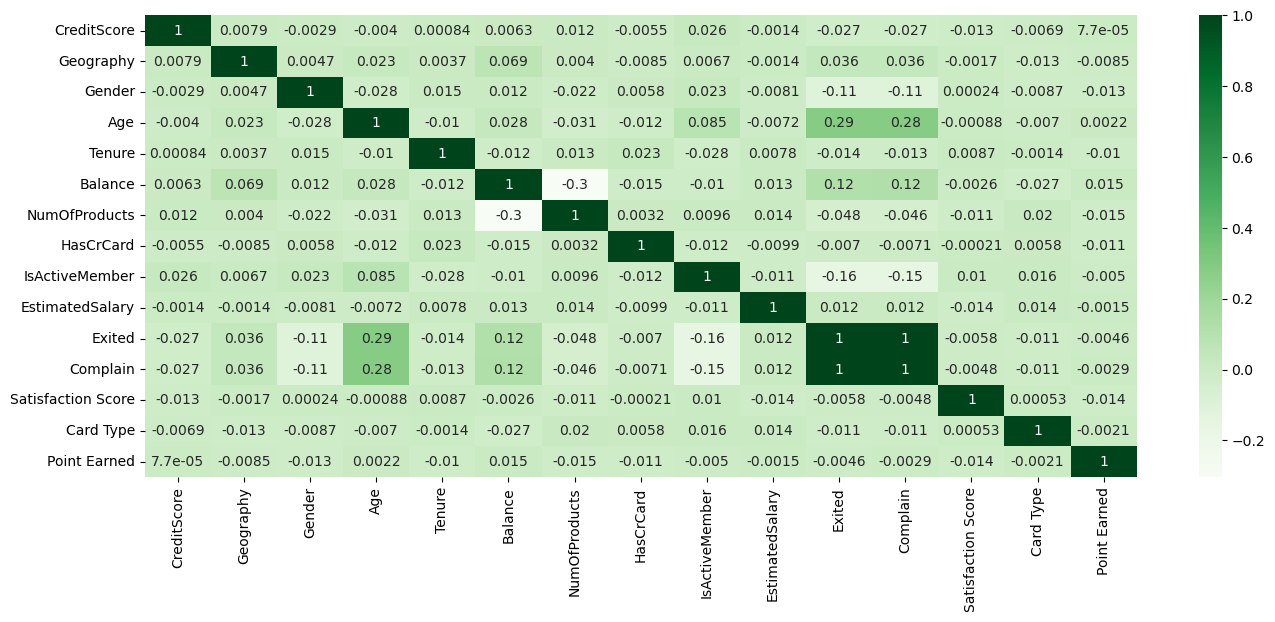

In [9]:
plt.figure(figsize = (16,6))

sns.heatmap(df.corr(),annot = True, cmap = "Greens")

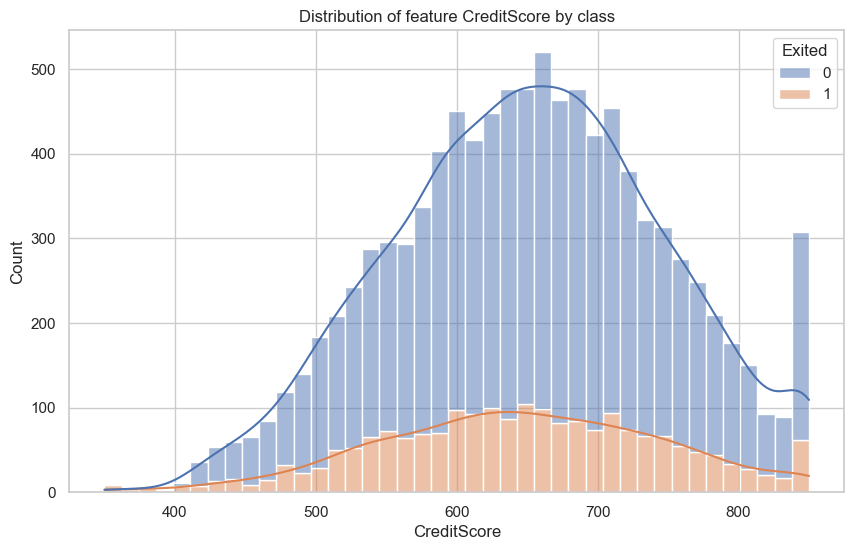

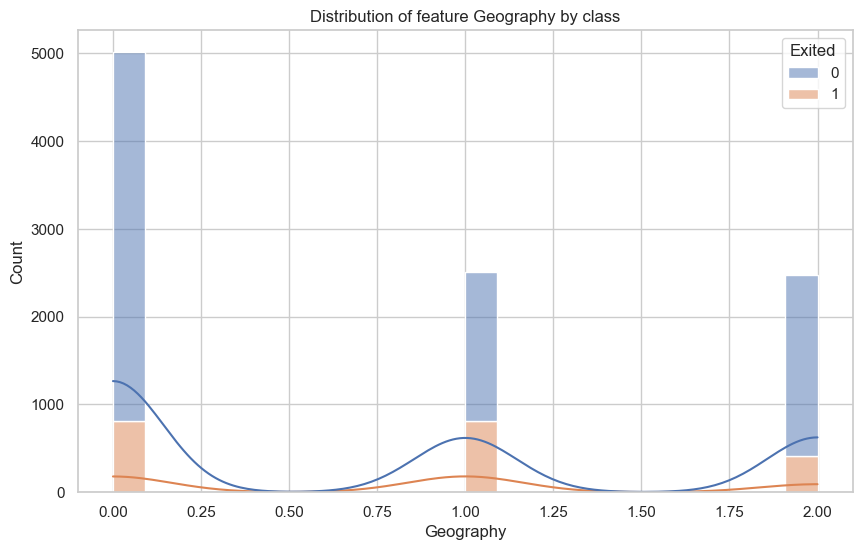

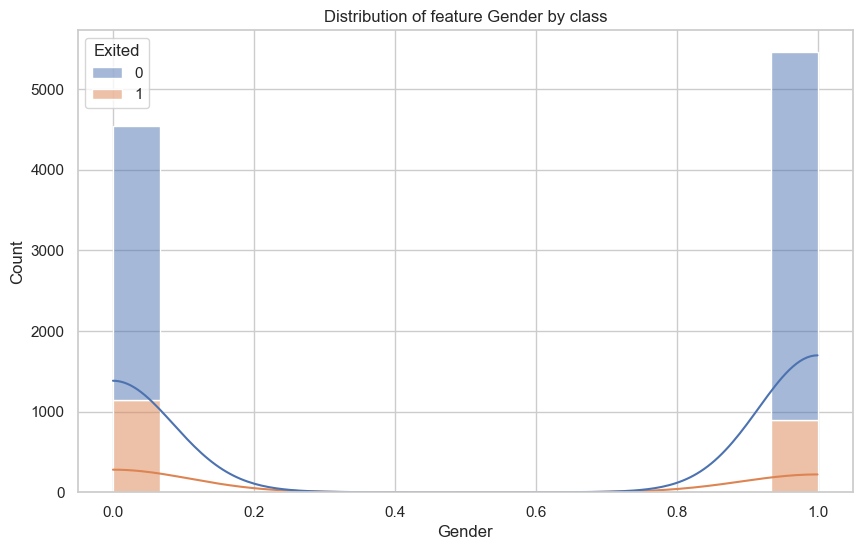

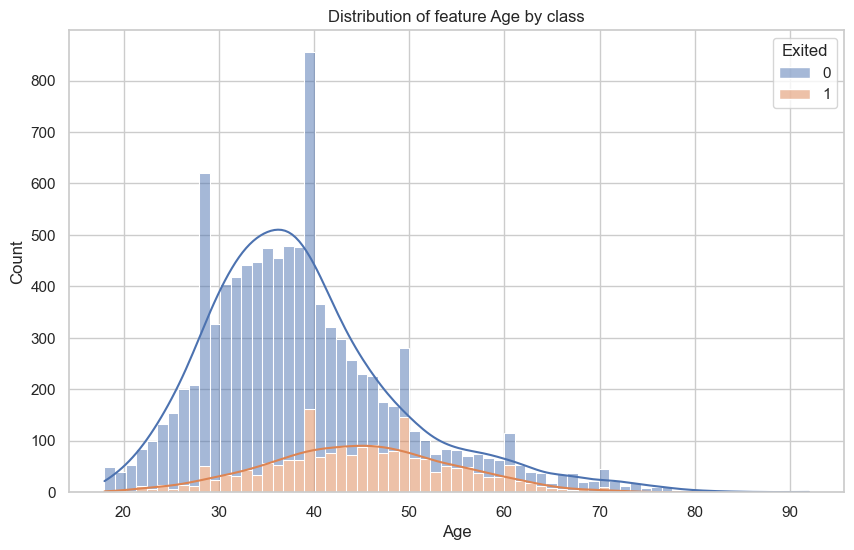

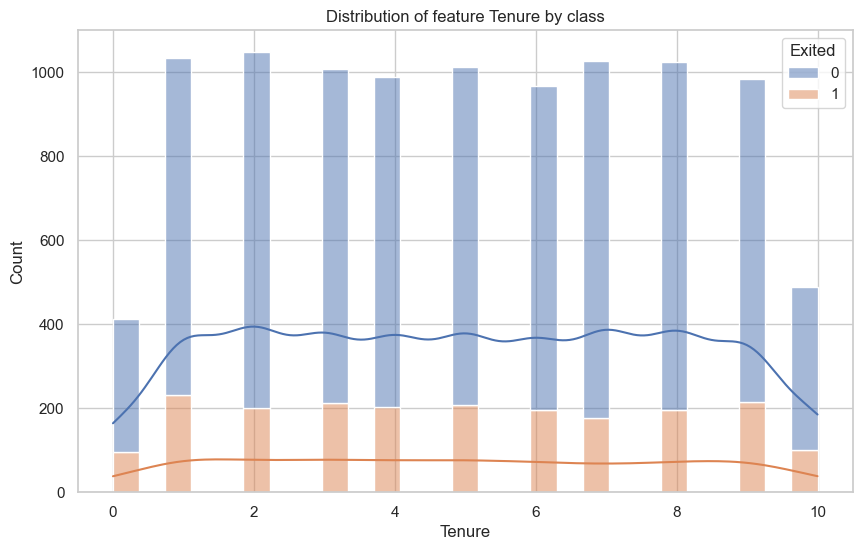

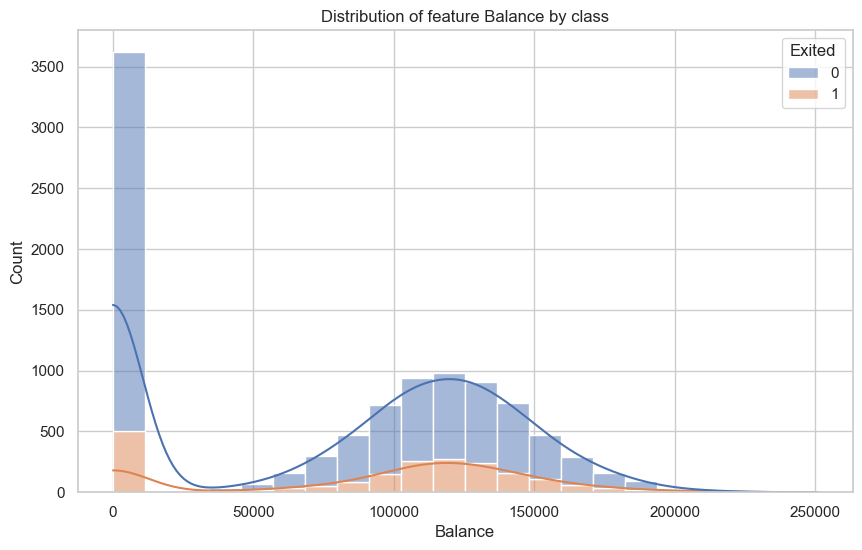

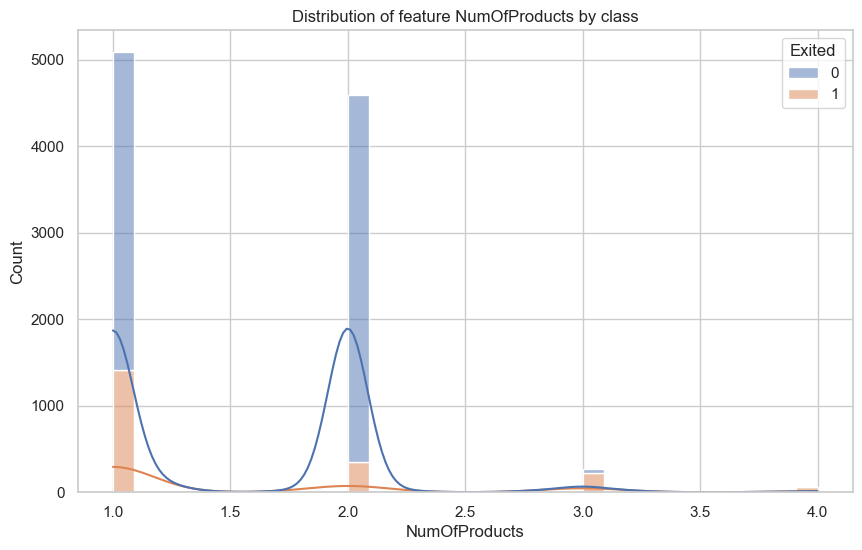

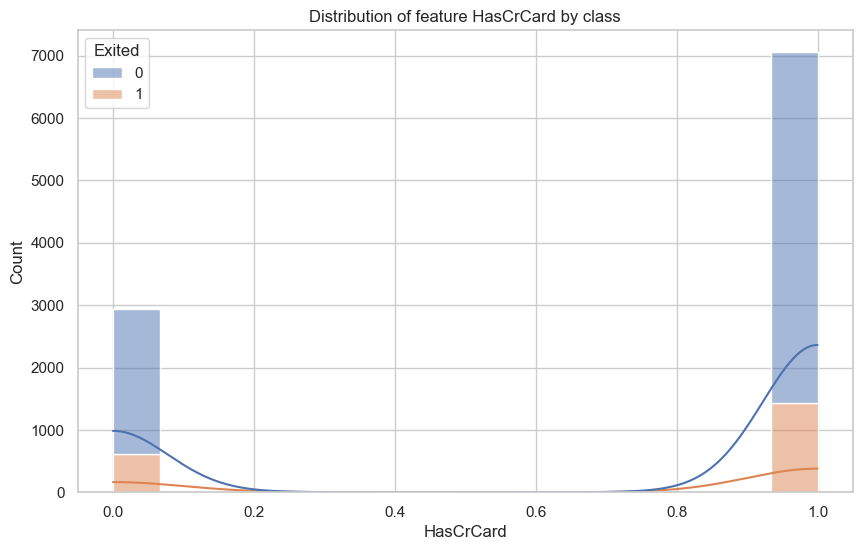

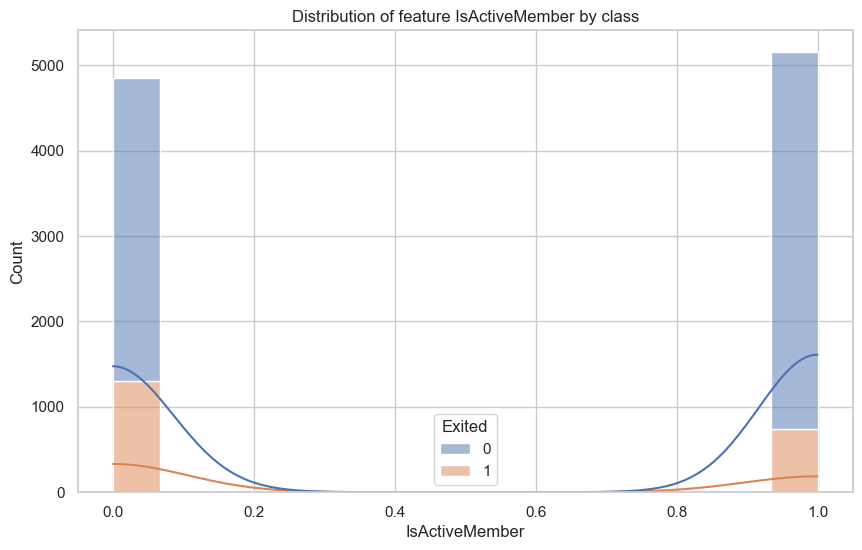

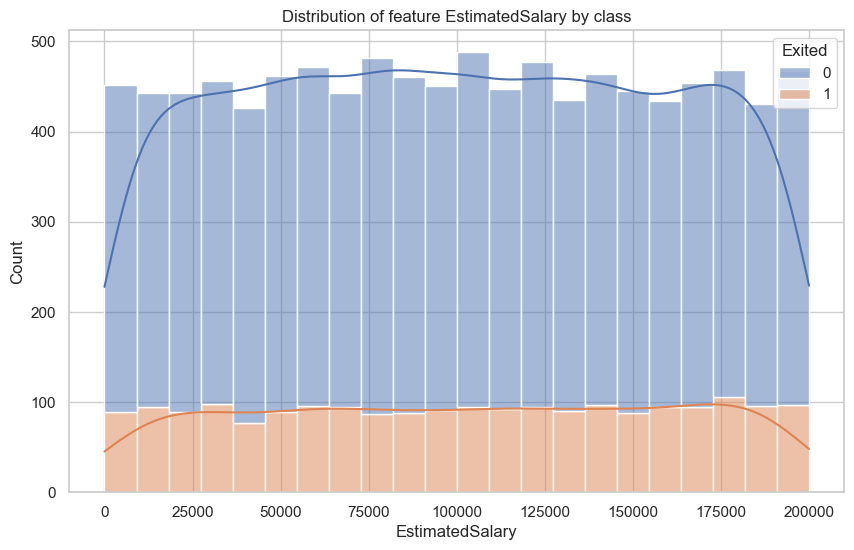

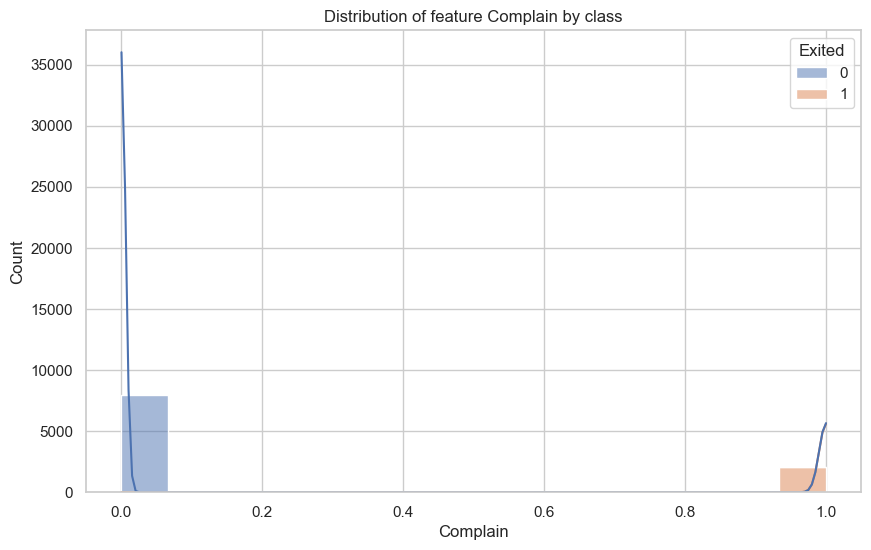

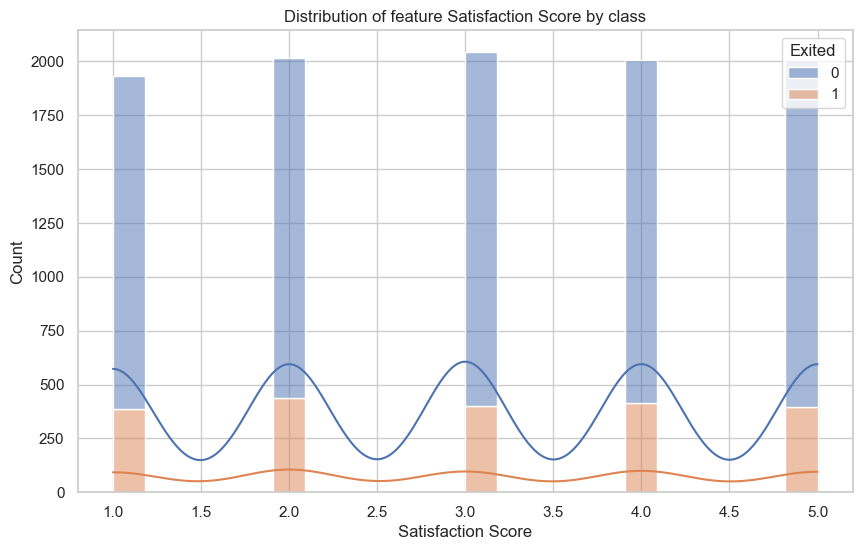

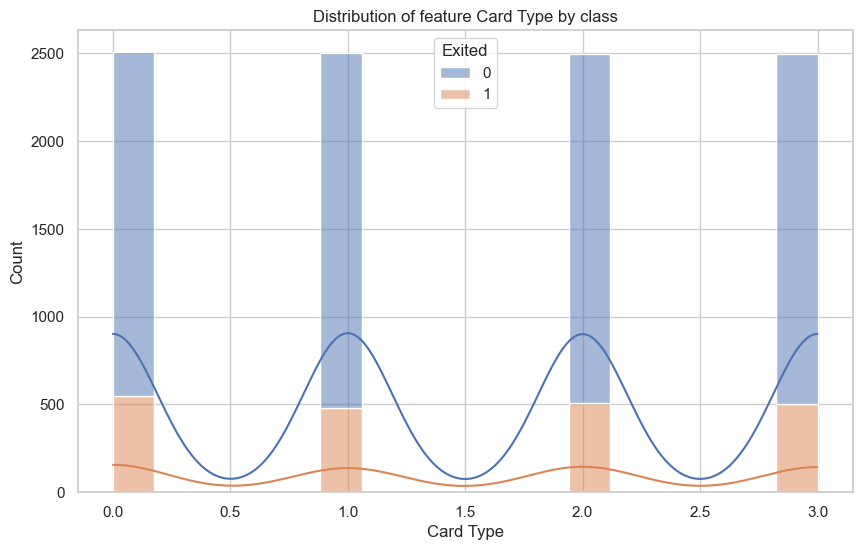

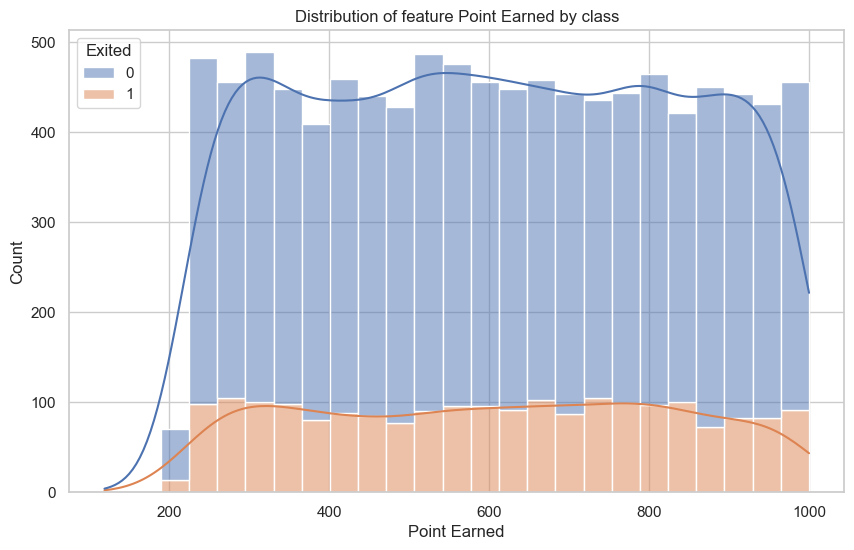

In [10]:
features = df.columns.drop('Exited')
num_features = len(features)

sns.set(style="whitegrid")

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Exited', multiple='stack', kde=True)
    plt.title(f'Distribution of feature {feature} by class')
    plt.show()

In [11]:
class_names   = ["0","1"]
feature_names = df.columns

# Models

In [12]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

def train_evaluate(model):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(f"{model} accuracy: {accuracy_score(predictions,y_test)} roc-auc:{roc_auc_score(predictions,y_test)}",)
    
    
lr = LogisticRegression()
ridge = Ridge(random_state=42)
eln = ElasticNet(random_state=42)
xgb = XGBClassifier(random_state=42,)
rf = RandomForestClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

train_evaluate(lr)
train_evaluate(xgb)
train_evaluate(rf)
train_evaluate(lgb)
train_evaluate(dt)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() accuracy: 0.7985 roc-auc:0.6202442635085123
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) accuracy: 0.999 roc-auc:0.9984165966010663
RandomForestClassifier(random_state=42) accuracy: 0.999 roc-auc:0.9984165966010663
[LightGBM] [Warning] Found whitespace in feature_name

# Post-training analysis

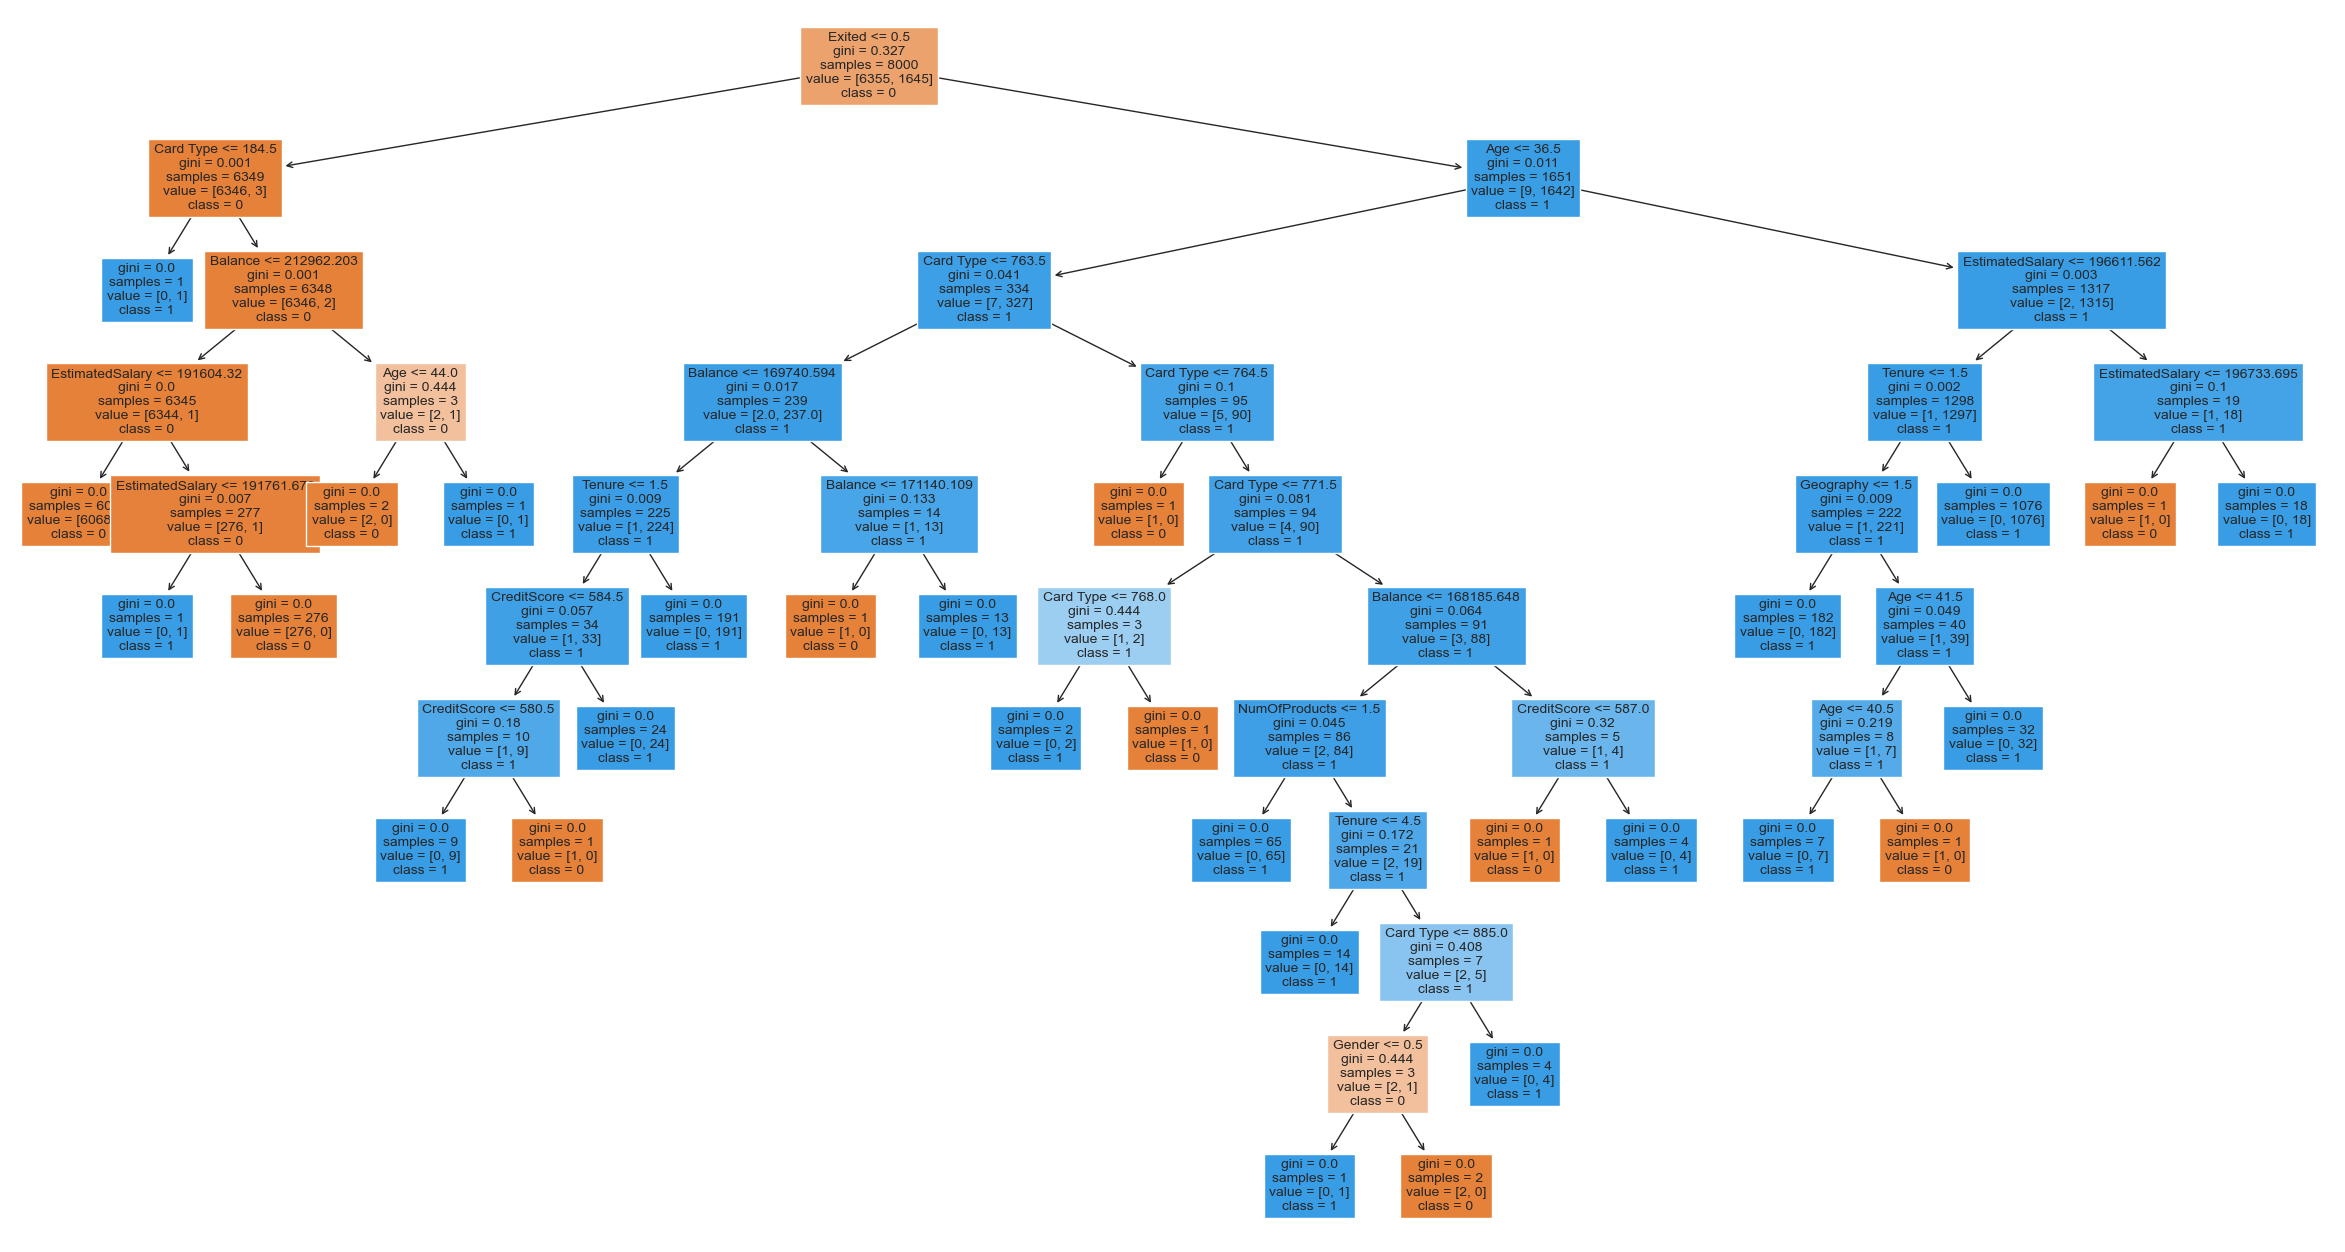

In [13]:
fig = plt.figure(figsize=(30,16))
_ = plot_tree(dt, 
              feature_names=feature_names,
              filled=True,
              class_names=class_names,
              fontsize=10)

In [15]:
def plot_feature_importance(model, names, threshold = None):
    feature_importance_df = pd.DataFrame.from_dict({'feature_importance': model.feature_importances_,
                                                    'feature': names})\
            .set_index('feature').sort_values('feature_importance', ascending = False)

    if threshold is not None:
        feature_importance_df = feature_importance_df[feature_importance_df.feature_importance > threshold]

    fig = px.bar(
        feature_importance_df,
        text_auto = '.2f',
        labels = {'value': 'feature importance'},
        title = 'Feature importances'
    )

    fig.update_layout(showlegend = False)
    fig.show()

plot_feature_importance(rf, X_train.columns)

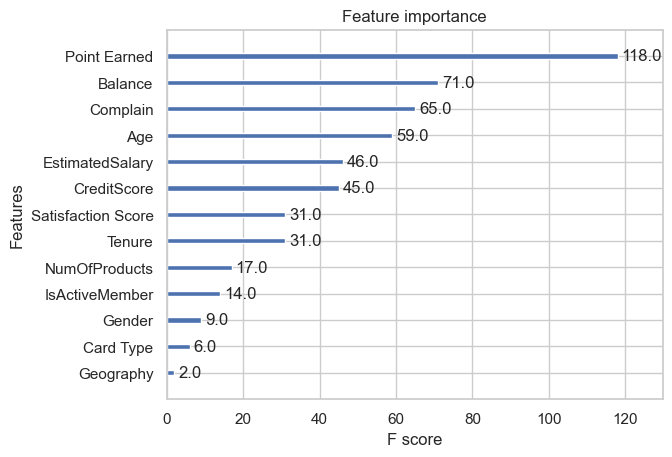

In [18]:
plot_importance(xgb)
plt.show()